# Chapter 3: Examples and Figures

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Estimating the Coefficients

In [2]:
# Load the advertising data set
f = '../data/Advertising.csv'
# ignore first column
advert = pd.read_csv(f).iloc[:, 1:]
advert.sample(5)

,TV,radio,newspaper,sales
63,102.7,29.6,8.4,14.0
129,59.6,12.0,43.1,9.7
12,23.8,35.1,65.9,9.2
74,213.4,24.6,13.1,17.0
111,241.7,38.0,23.2,21.8


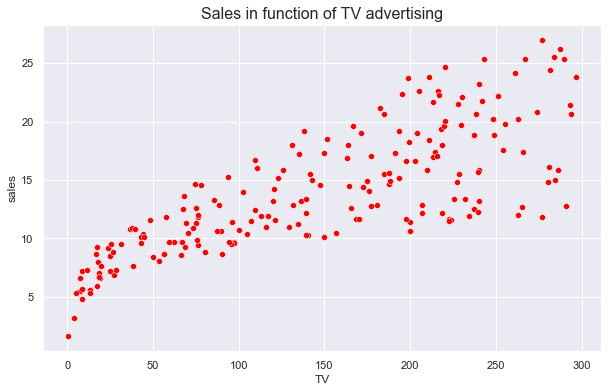

In [18]:
sns.set(context='notebook', 
        style='darkgrid', 
        rc={'figure.figsize':(10, 6)})

ax = sns.scatterplot(data=advert, x='TV', y='sales', 
                    color='red')
ax.set_title('Sales in function of TV advertising',
            fontdict={'fontsize':16});

In [10]:
from sklearn.linear_model import LinearRegression

X = advert[['TV']]
y = advert['sales']

In [11]:
linear_regression = LinearRegression()
linear_regression.fit(X, y)

LinearRegression()

In [13]:
weight_tv = linear_regression.coef_[0]
weight_tv

0.04753664043301975

In [15]:
intercept_sales = linear_regression.intercept_
intercept_sales

7.032593549127695

$\Rightarrow \hat y = 7.03 + 0.0475 X$,  
with $\hat \beta_0 = 7.03$ and $\hat \beta_1 = 0.0475$.  

In [ ]:
y_hat = intercept_sales + advert['TV'] * weight_tv

In other words, according to this approximation, an additional \\$1,000 spent on TV advertising is associated with selling approximately 47.5 additional units of the product.  
Let's visualize the results:

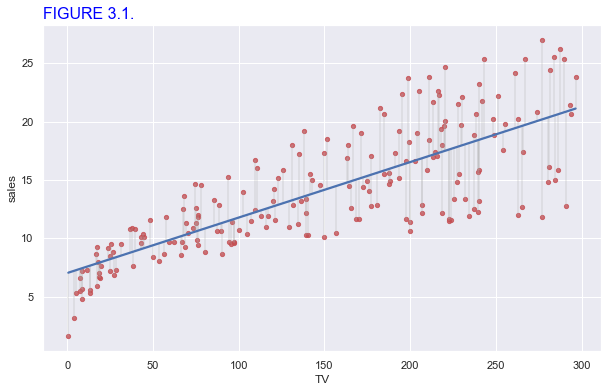

In [26]:
sns.regplot(data=advert, x='TV', y='sales', ci=False, scatter_kws={'color':'r', 's':18})
plt.vlines(advert['TV'], y_hat, advert['sales'], lw = .4, colors='darkgrey')
plt.title('FIGURE 3.1.', fontdict={'fontsize': 16,
                                   'color': 'blue'}, loc='left');

Ordinary least squares Linear Regression: The fit is found by minimizing the *residual sum of squares* (RSS) between the observed targets in the dataset and the target predict by the linear approximation.  
Each gray line segment represents a residual. In this case a linear fit captures the essence of the relationship, although it overestimates the trend in the left of the plot.

Different parameter values produce different mean squared errors. Let's visualize a number of combinations of $\hat \beta_0$ and $\hat \beta_1$ and their impact on RSS

In [31]:
b0 = np.linspace(5, 9, 50)
b1 = np.linspace(.03, .07, 50)


errors = np.array([np.mean((advert['sales'].values - (b_0 + b_1 * advert['TV'].values)) ** 2) for b_1 in b1 for b_0 in b0])

In [32]:
B0, B1 = np.meshgrid(b0, b1)
errors_mesh = errors.reshape(B0.shape)

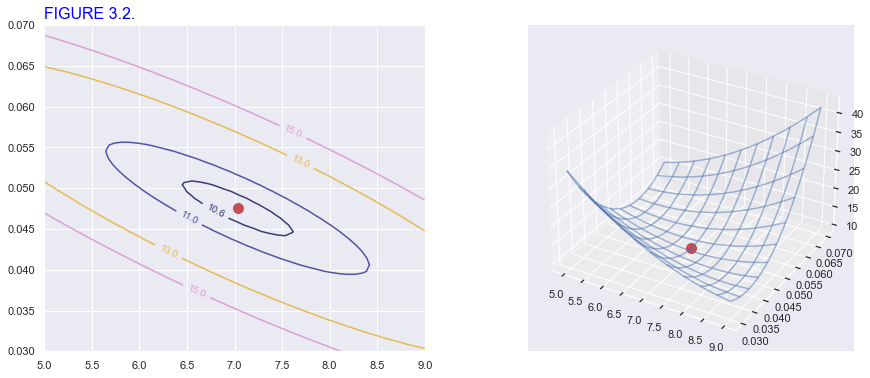

In [88]:
from mpl_toolkits.mplot3d import Axes3D

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.4))

# first subplot
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
cs = ax.contour(B0, B1, errors_mesh, cmap='tab20b', levels=[10.6, 11, 13, 15])
manual_locations = [(7, .05)]
plt.clabel(cs, inline=1, fontsize=10)
plt.scatter(intercept_sales, weight_tv, c='r', s=100)
plt.title('FIGURE 3.2.', fontdict={'fontsize': 16,
                                   'color': 'blue'}, loc='left');

# second subplot
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(intercept_sales, weight_tv, errors_mesh.min(), s=100, c='r')
ax.plot_wireframe(B0, B1, errors_mesh, rstride=5, cstride=5, alpha=.5);



Contour and 3-D plots of the RSS on the Advertising data, using sales as the response and TV as the predictor. The red dots correspond to the least squares estimates for simple linear regression $\hat \beta_0$ and $\hat \beta_1$ given by:  

$$\hat\beta_1 = \frac{\sum_{i=1}^n(x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^n(x_i - \bar x)^2}$$

$$\hat \beta_0 = \bar y - \hat \beta_1 \bar x$$

These values clearly minimize the RSS.